# A TensorFlow very (very...) simple Linear Regression model

## Prepare the notebook

Import everything needed to run the notebook.

To know what the `%matplotlib inline` command does check this [link](https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline).

The following libraries will also be imported:
* numpy (as np as customary)
* matplotlib.pyplot (as plt as customary)
* tensorflow (as tf as customary)
* ops to reset the graph

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops

## Prepare the data

The data used for this model was created using the Excel in the same directory as this notebook called linear_regression_data.xlsx . It will be imported as two numpy arrays.

In [22]:
x = np.array([
    -7,
    5,
    7,
    12,
    2,
    4,
    5,
    6,
    19,
    14,
    16,
    15,
    11,
    8,
    18,
    -2,
    14,
    17,
    7,
    17,
])
y = np.array([
    -7.56,
    21.01,
    29.11,
    47.89,
    14.11,
    16.69,
    29.81,
    28.67,
    63.94,
    54.8,
    49.65,
    52.26,
    44.86,
    40.45,
    70.92,
    -0.37,
    44.34,
    64.27,
    32.85,
    50.14,
])

### Check the data

See the shape of the arrays and plot it.

x.shape():
(20,)
y.shape():
(20,)


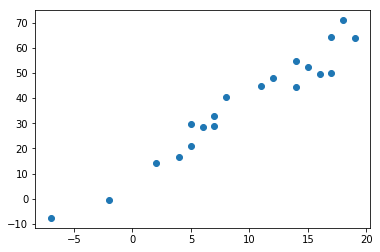

In [23]:
print('x.shape():')
print(x.shape)
print('y.shape():')
print(y.shape)
plt.scatter(x, y)

## TensorFlow model

Now to the good stuff.

### Configurable options

This are minimal configuration options. They can be changed to see possible different outcomes.

For instance, changing learning_rate to a larger number (say 0.01) will stop the model from working because for each step of Gradient Descent it will go too far and make the cost larger.

In [62]:
# Config
num_epochs = 1000
learning_rate = 0.001
# /Config

### Creating the graph

In TensorFlow's low level API you initially create a graph that contains the model's operations. In a further step this graph will be used to obtain the values to minimize the model's cost.

`ops.reset_default_graph()` is needed to be allow this to be run multiple times.

#### Placeholders for the data
`X = tf.placeholder(tf.float32, name='X')` and `Y = tf.placeholder(tf.float32, name='Y')` create two placeholders that are used as parts of the model that will be replaced with data at runtime.

#### Variables
`a = tf.get_variable('a', initializer=0.)` and `b = tf.get_variable('b', initializer=0.)` are the variables for the model, they represent the key part to the inference process using an arbitrary new value for x.

#### Cost
`h` is the function that predicts the output based on a given x value using the data. Since the model is trying to fit a linear equation to predict y values according to arbitrary x values the equation is `h = a * x + b` but in this case X and Y will be used and the operation is a matrix multiplication. During the runtime X and Y will be replaced by the actual data.

Since we are trying to fit a model to the data, we want to have a model that fits it most precisely. The common cost function for this model is:
\begin{equation*}
J(a,b) = \frac{1}{2m} \sum_{i=1}^m (h(x_i) - y_i)^2
\end{equation*}

But for simplicity reasons we'll use:
\begin{equation*}
J(a,b) = \sum_{i=1}^m (h(x_i) - y_i)^2
\end{equation*}

Not dividing doesn't change its minimum points for a and b. So `cost = tf.reduce_mean( (h - Y)**2 )` represents the cost function.

#### Gradient Descent Operation
```
optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=learning_rate
).minimize(cost)
```

This code does 3 things:
* Creates an optimizer that uses Gradient descent.
* Calls the optimizer's minimize function telling it to minimize the cost.
* Assigns this minimization to a variable called optimizer.

#### Initialize variables operation
`init = tf.global_variables_initializer()` is the initialization operation that will be executed later.

In [63]:
ops.reset_default_graph()

X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

a = tf.get_variable('a', initializer=0.)
b = tf.get_variable('b', initializer=0.)

h = a * X + b

cost = tf.reduce_mean( (h - Y)**2 )

optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=learning_rate
).minimize(cost)

init = tf.global_variables_initializer()

### Running the Model

#### Obtained a and b
`found_a` and `found_b` are used to store values for a and b at a given point of the model run.

#### Session
To run the model we need to do it inside a session: `with tf.Session() as sess:`.

#### Initializing variables
We run the variable initialization: `sess.run(init)`.

#### The actual training
The model will use Gradient Descent several times, for this we put the operation in a loop: `for epoch in range(num_epochs):`.

The following code will run one iteration of Gradient Descent, it needs the data that's why with `feed_dict` x and y are supplied (notice that X and Y are placeholders and x and y are the actual data).
```
_, costValue = sess.run(
    [optimizer, cost],
    feed_dict={
        X: x,
        Y: y,
    }
)
```

After every iteration we assign values to `found_a` and `found_b`.

Every 10 percent of the num_epochs we print cost/a/b.

In [65]:
found_a = 0
found_b = 0

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(num_epochs):
        _, costValue = sess.run(
            [optimizer, cost],
            feed_dict={
                X: x,
                Y: y,
            }
        )
        found_a = a.eval()
        found_b = b.eval()
        if epoch % (num_epochs/10) == 0: # Every 10 percent
            print("... epoch: " + str(epoch))
            print(f"cost[{str(costValue)}] / a[{str(a.eval())}] / b[{str(b.eval())}]")

... epoch: 0
cost[1824.1741] / a[0.980287] / b[0.074784]
... epoch: 100
cost[52.83136] / a[3.5395284] / b[0.91865784]
... epoch: 200
cost[48.979267] / a[3.4966853] / b[1.5373776]
... epoch: 300
cost[45.62937] / a[3.4567327] / b[2.1143577]
... epoch: 400
cost[42.716213] / a[3.4194753] / b[2.6524148]
... epoch: 500
cost[40.182854] / a[3.3847315] / b[3.1541722]
... epoch: 600
cost[37.979774] / a[3.3523312] / b[3.622081]
... epoch: 700
cost[36.063896] / a[3.3221169] / b[4.058425]
... epoch: 800
cost[34.397785] / a[3.2939405] / b[4.4653363]
... epoch: 900
cost[32.948906] / a[3.2676654] / b[4.844793]


### Seing the obtained values in a plot

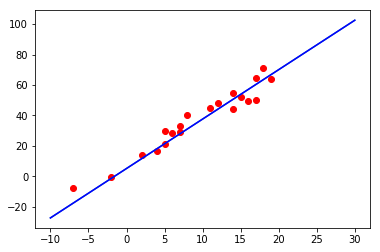

In [66]:
xrange = np.linspace(-10, 30, 2)

# Plot points
plt.plot(x, y, 'ro', xrange, xrange*found_a+found_b)

# Plot resulting function
plt.plot(xrange, xrange * found_a + found_b, 'b')

plt.show()